In [1]:
#THIS WORKS

from pydataxm import *                          
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta
objetoAPI = pydataxm.ReadDB()  

df = objetoAPI.get_collections() 


variables_sistema = ['DemaReal', 'DemaCome', 'PrecBolsNaci', 'Gene', 'GeneIdea', 'MaxPrecOferNal', 'CompBolsNaciEner', 'CompContEner', 'factorEmisionCO2e', 'ImpoEner']
var_names = {'DemaReal': 'Real Demand[kWh]', 'DemaCome': 'Commercial Demand[kWh]', 'PrecBolsNaci': 'National Pricesetting price[COP/kWh]', 'Gene': 'Generation[kWh]', 'GeneIdea': 'Ideal Generation[kWh]', 'MaxPrecOferNal': 'Maximum National Bidding Price[COP/kWh]', 'CompBolsNaciEner': 'Energy Bought Domestic Demand[kWh]', 'CompContEner': 'Energy Bought Long Term Contract[kWh]', 'factorEmisionCO2e': 'CO2 Emission Factor[gCO2e/kWh]', 'ImpoEner': 'Energy Import[kWh]'}
#demacome is not necessary.
# variables_sistema = ['DemaReal', 'DemaCome', 'PrecBolsNaci']
# variables_agente = []
# variables_recurso = []


change_variable = False
complete_df = pd.DataFrame()
for i in variables_sistema:
    df_combined_sistema = pd.DataFrame()
    months = 67
    start_date = dt.datetime(2018, 1, 1)
    start_list = [start_date + relativedelta(months=i) for i in range(0, months)] 
    end_list = [start_date + relativedelta(months=i+1, days=-1) for i in range(0, months)]
    for index, start in enumerate(start_list):
        # print(index)
        print("Done months:    ,", index, " of ", len(start_list))
        index_of_value = variables_sistema.index(i)
        print("Done variables:    ,", index_of_value, " of ", len(variables_sistema))
        start_date = start_list[index]
        end_date = end_list[index]

        df =objetoAPI.get_collections(i) 

        print('-------------------')

        df_variable = objetoAPI.request_data(
                    i,           
                    "Sistema",             
                    start_date.date(),  
                    end_date.date()) 
        df_variable = df_variable.drop(columns = ['Id','Values_code'])
        melted_df = pd.melt(df_variable, id_vars=['Date'], value_vars=[f'Values_Hour{i:02d}' for i in range(1, 24)], var_name='Hour', value_name=i)
        melted_df[i] = melted_df[i].apply(lambda x: f'{x:.2f}')
        melted_df[i] = melted_df[i].astype(float)
        melted_df['Timestamp'] = pd.to_datetime(melted_df['Date']) + pd.to_timedelta(melted_df['Hour'].str.split('Hour').str[-1].astype(int), unit='h')
        melted_df.drop(columns=['Date', 'Hour'], inplace=True)

        df_combined_sistema = pd.concat([df_combined_sistema, melted_df], ignore_index=True)
        df_combined_sistema.sort_values(by=['Timestamp'], inplace=True)
        # df_combined_sistema.set_index('Timestamp', inplace=True)
    # print(df_combined_sistema.describe())
    if change_variable == False:
        complete_df = df_combined_sistema
        change_variable = True
        # print(complete_df.head())
    else:
        #only keep the values of complete_df that are in df_combined_sistema
        complete_df = complete_df[complete_df.index.isin(df_combined_sistema.index)]
        try:
            # complete_df = pd.concat([complete_df, df_combined_sistema], axis=1)
            complete_df = pd.merge(complete_df, df_combined_sistema, on='Timestamp', how='outer')
            # print(complete_df.tail())
        except Exception as e:
            print("!!!!!!!")
            print(e)
            print("!!!!!!!")
complete_df.sort_values(by=['Timestamp'], inplace=True)
complete_df.set_index('Timestamp', inplace=True)

#change complete_df column names to the ones in var_names
complete_df.rename(columns=var_names, inplace=True)
complete_df.head()

Done months:    , 0  of  67
Done variables:    , 0  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 1  of  67
Done variables:    , 0  of  10
-------------------
Done months:    , 2  of  67
Done variables:    , 0  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 3  of  67
Done variables:    , 0  of  10
-------------------
Done months:    , 4  of  67
Done variables:    , 0  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 5  of  67
Done variables:    , 0  of  10
-------------------
Done months:    , 6  of  67
Done variables:    , 0  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 7  of  67
Done variables:    , 0  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 8  of  67
Done variables:    , 0  of  10
-------------------
Done months:    , 9  of  67
Done variables:    , 0  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 10  of  67
Done variables:    , 0  of  10
-------------------
Done months:    , 11  of  67
Done variables:    , 0  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 12  of  67
Done variables:    , 0  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 13  of  67
Done variables:    , 0  of  10
-------------------
Done months:    , 14  of  67
Done variables:    , 0  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 15  of  67
Done variables:    , 0  of  10
-------------------
Done months:    , 16  of  67
Done variables:    , 0  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 17  of  67
Done variables:    , 0  of  10
-------------------
Done months:    , 18  of  67
Done variables:    , 0  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 19  of  67
Done variables:    , 0  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 20  of  67
Done variables:    , 0  of  10
-------------------
Done months:    , 21  of  67
Done variables:    , 0  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 22  of  67
Done variables:    , 0  of  10
-------------------
Done months:    , 23  of  67
Done variables:    , 0  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 24  of  67
Done variables:    , 0  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 25  of  67
Done variables:    , 0  of  10
-------------------
Done months:    , 26  of  67
Done variables:    , 0  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 27  of  67
Done variables:    , 0  of  10
-------------------
Done months:    , 28  of  67
Done variables:    , 0  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 29  of  67
Done variables:    , 0  of  10
-------------------
Done months:    , 30  of  67
Done variables:    , 0  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 31  of  67
Done variables:    , 0  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 32  of  67
Done variables:    , 0  of  10
-------------------
Done months:    , 33  of  67
Done variables:    , 0  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 34  of  67
Done variables:    , 0  of  10
-------------------
Done months:    , 35  of  67
Done variables:    , 0  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 36  of  67
Done variables:    , 0  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 37  of  67
Done variables:    , 0  of  10
-------------------
Done months:    , 38  of  67
Done variables:    , 0  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 39  of  67
Done variables:    , 0  of  10
-------------------
Done months:    , 40  of  67
Done variables:    , 0  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 41  of  67
Done variables:    , 0  of  10
-------------------
Done months:    , 42  of  67
Done variables:    , 0  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 43  of  67
Done variables:    , 0  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 44  of  67
Done variables:    , 0  of  10
-------------------
Done months:    , 45  of  67
Done variables:    , 0  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 46  of  67
Done variables:    , 0  of  10
-------------------
Done months:    , 47  of  67
Done variables:    , 0  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 48  of  67
Done variables:    , 0  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 49  of  67
Done variables:    , 0  of  10
-------------------
Done months:    , 50  of  67
Done variables:    , 0  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 51  of  67
Done variables:    , 0  of  10
-------------------
Done months:    , 52  of  67
Done variables:    , 0  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 53  of  67
Done variables:    , 0  of  10
-------------------
Done months:    , 54  of  67
Done variables:    , 0  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 55  of  67
Done variables:    , 0  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 56  of  67
Done variables:    , 0  of  10
-------------------
Done months:    , 57  of  67
Done variables:    , 0  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 58  of  67
Done variables:    , 0  of  10
-------------------
Done months:    , 59  of  67
Done variables:    , 0  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 60  of  67
Done variables:    , 0  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 61  of  67
Done variables:    , 0  of  10
-------------------
Done months:    , 62  of  67
Done variables:    , 0  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 63  of  67
Done variables:    , 0  of  10
-------------------
Done months:    , 64  of  67
Done variables:    , 0  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 65  of  67
Done variables:    , 0  of  10
-------------------
Done months:    , 66  of  67
Done variables:    , 0  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 0  of  67
Done variables:    , 1  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 1  of  67
Done variables:    , 1  of  10
-------------------
Done months:    , 2  of  67
Done variables:    , 1  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 3  of  67
Done variables:    , 1  of  10
-------------------
Done months:    , 4  of  67
Done variables:    , 1  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 5  of  67
Done variables:    , 1  of  10
-------------------
Done months:    , 6  of  67
Done variables:    , 1  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 7  of  67
Done variables:    , 1  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 8  of  67
Done variables:    , 1  of  10
-------------------
Done months:    , 9  of  67
Done variables:    , 1  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 10  of  67
Done variables:    , 1  of  10
-------------------
Done months:    , 11  of  67
Done variables:    , 1  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 12  of  67
Done variables:    , 1  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 13  of  67
Done variables:    , 1  of  10
-------------------
Done months:    , 14  of  67
Done variables:    , 1  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 15  of  67
Done variables:    , 1  of  10
-------------------
Done months:    , 16  of  67
Done variables:    , 1  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 17  of  67
Done variables:    , 1  of  10
-------------------
Done months:    , 18  of  67
Done variables:    , 1  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 19  of  67
Done variables:    , 1  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 20  of  67
Done variables:    , 1  of  10
-------------------
Done months:    , 21  of  67
Done variables:    , 1  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 22  of  67
Done variables:    , 1  of  10
-------------------
Done months:    , 23  of  67
Done variables:    , 1  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 24  of  67
Done variables:    , 1  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 25  of  67
Done variables:    , 1  of  10
-------------------
Done months:    , 26  of  67
Done variables:    , 1  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 27  of  67
Done variables:    , 1  of  10
-------------------
Done months:    , 28  of  67
Done variables:    , 1  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 29  of  67
Done variables:    , 1  of  10
-------------------
Done months:    , 30  of  67
Done variables:    , 1  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 31  of  67
Done variables:    , 1  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 32  of  67
Done variables:    , 1  of  10
-------------------
Done months:    , 33  of  67
Done variables:    , 1  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 34  of  67
Done variables:    , 1  of  10
-------------------
Done months:    , 35  of  67
Done variables:    , 1  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 36  of  67
Done variables:    , 1  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 37  of  67
Done variables:    , 1  of  10
-------------------
Done months:    , 38  of  67
Done variables:    , 1  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 39  of  67
Done variables:    , 1  of  10
-------------------
Done months:    , 40  of  67
Done variables:    , 1  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 41  of  67
Done variables:    , 1  of  10
-------------------
Done months:    , 42  of  67
Done variables:    , 1  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 43  of  67
Done variables:    , 1  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 44  of  67
Done variables:    , 1  of  10
-------------------
Done months:    , 45  of  67
Done variables:    , 1  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 46  of  67
Done variables:    , 1  of  10
-------------------
Done months:    , 47  of  67
Done variables:    , 1  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 48  of  67
Done variables:    , 1  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 49  of  67
Done variables:    , 1  of  10
-------------------
Done months:    , 50  of  67
Done variables:    , 1  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 51  of  67
Done variables:    , 1  of  10
-------------------
Done months:    , 52  of  67
Done variables:    , 1  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 53  of  67
Done variables:    , 1  of  10
-------------------
Done months:    , 54  of  67
Done variables:    , 1  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 55  of  67
Done variables:    , 1  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 56  of  67
Done variables:    , 1  of  10
-------------------
Done months:    , 57  of  67
Done variables:    , 1  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 58  of  67
Done variables:    , 1  of  10
-------------------
Done months:    , 59  of  67
Done variables:    , 1  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 60  of  67
Done variables:    , 1  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 61  of  67
Done variables:    , 1  of  10
-------------------
Done months:    , 62  of  67
Done variables:    , 1  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 63  of  67
Done variables:    , 1  of  10
-------------------
Done months:    , 64  of  67
Done variables:    , 1  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 65  of  67
Done variables:    , 1  of  10
-------------------
Done months:    , 66  of  67
Done variables:    , 1  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 0  of  67
Done variables:    , 2  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 1  of  67
Done variables:    , 2  of  10
-------------------
Done months:    , 2  of  67
Done variables:    , 2  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 3  of  67
Done variables:    , 2  of  10
-------------------
Done months:    , 4  of  67
Done variables:    , 2  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 5  of  67
Done variables:    , 2  of  10
-------------------
Done months:    , 6  of  67
Done variables:    , 2  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 7  of  67
Done variables:    , 2  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 8  of  67
Done variables:    , 2  of  10
-------------------
Done months:    , 9  of  67
Done variables:    , 2  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 10  of  67
Done variables:    , 2  of  10
-------------------
Done months:    , 11  of  67
Done variables:    , 2  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 12  of  67
Done variables:    , 2  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 13  of  67
Done variables:    , 2  of  10
-------------------
Done months:    , 14  of  67
Done variables:    , 2  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 15  of  67
Done variables:    , 2  of  10
-------------------
Done months:    , 16  of  67
Done variables:    , 2  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 17  of  67
Done variables:    , 2  of  10
-------------------
Done months:    , 18  of  67
Done variables:    , 2  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 19  of  67
Done variables:    , 2  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 20  of  67
Done variables:    , 2  of  10
-------------------
Done months:    , 21  of  67
Done variables:    , 2  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 22  of  67
Done variables:    , 2  of  10
-------------------
Done months:    , 23  of  67
Done variables:    , 2  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 24  of  67
Done variables:    , 2  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 25  of  67
Done variables:    , 2  of  10
-------------------
Done months:    , 26  of  67
Done variables:    , 2  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 27  of  67
Done variables:    , 2  of  10
-------------------
Done months:    , 28  of  67
Done variables:    , 2  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 29  of  67
Done variables:    , 2  of  10
-------------------
Done months:    , 30  of  67
Done variables:    , 2  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 31  of  67
Done variables:    , 2  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 32  of  67
Done variables:    , 2  of  10
-------------------
Done months:    , 33  of  67
Done variables:    , 2  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 34  of  67
Done variables:    , 2  of  10
-------------------
Done months:    , 35  of  67
Done variables:    , 2  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 36  of  67
Done variables:    , 2  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 37  of  67
Done variables:    , 2  of  10
-------------------
Done months:    , 38  of  67
Done variables:    , 2  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 39  of  67
Done variables:    , 2  of  10
-------------------
Done months:    , 40  of  67
Done variables:    , 2  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 41  of  67
Done variables:    , 2  of  10
-------------------
Done months:    , 42  of  67
Done variables:    , 2  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 43  of  67
Done variables:    , 2  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 44  of  67
Done variables:    , 2  of  10
-------------------
Done months:    , 45  of  67
Done variables:    , 2  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 46  of  67
Done variables:    , 2  of  10
-------------------
Done months:    , 47  of  67
Done variables:    , 2  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 48  of  67
Done variables:    , 2  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 49  of  67
Done variables:    , 2  of  10
-------------------
Done months:    , 50  of  67
Done variables:    , 2  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 51  of  67
Done variables:    , 2  of  10
-------------------
Done months:    , 52  of  67
Done variables:    , 2  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 53  of  67
Done variables:    , 2  of  10
-------------------
Done months:    , 54  of  67
Done variables:    , 2  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 55  of  67
Done variables:    , 2  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 56  of  67
Done variables:    , 2  of  10
-------------------
Done months:    , 57  of  67
Done variables:    , 2  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 58  of  67
Done variables:    , 2  of  10
-------------------
Done months:    , 59  of  67
Done variables:    , 2  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 60  of  67
Done variables:    , 2  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 61  of  67
Done variables:    , 2  of  10
-------------------
Done months:    , 62  of  67
Done variables:    , 2  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 63  of  67
Done variables:    , 2  of  10
-------------------
Done months:    , 64  of  67
Done variables:    , 2  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 65  of  67
Done variables:    , 2  of  10
-------------------
Done months:    , 66  of  67
Done variables:    , 2  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 0  of  67
Done variables:    , 3  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 1  of  67
Done variables:    , 3  of  10
-------------------
Done months:    , 2  of  67
Done variables:    , 3  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 3  of  67
Done variables:    , 3  of  10
-------------------
Done months:    , 4  of  67
Done variables:    , 3  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 5  of  67
Done variables:    , 3  of  10
-------------------
Done months:    , 6  of  67
Done variables:    , 3  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 7  of  67
Done variables:    , 3  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 8  of  67
Done variables:    , 3  of  10
-------------------
Done months:    , 9  of  67
Done variables:    , 3  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 10  of  67
Done variables:    , 3  of  10
-------------------
Done months:    , 11  of  67
Done variables:    , 3  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 12  of  67
Done variables:    , 3  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 13  of  67
Done variables:    , 3  of  10
-------------------
Done months:    , 14  of  67
Done variables:    , 3  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 15  of  67
Done variables:    , 3  of  10
-------------------
Done months:    , 16  of  67
Done variables:    , 3  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 17  of  67
Done variables:    , 3  of  10
-------------------
Done months:    , 18  of  67
Done variables:    , 3  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 19  of  67
Done variables:    , 3  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 20  of  67
Done variables:    , 3  of  10
-------------------
Done months:    , 21  of  67
Done variables:    , 3  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 22  of  67
Done variables:    , 3  of  10
-------------------
Done months:    , 23  of  67
Done variables:    , 3  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 24  of  67
Done variables:    , 3  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 25  of  67
Done variables:    , 3  of  10
-------------------
Done months:    , 26  of  67
Done variables:    , 3  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 27  of  67
Done variables:    , 3  of  10
-------------------
Done months:    , 28  of  67
Done variables:    , 3  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 29  of  67
Done variables:    , 3  of  10
-------------------
Done months:    , 30  of  67
Done variables:    , 3  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 31  of  67
Done variables:    , 3  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 32  of  67
Done variables:    , 3  of  10
-------------------
Done months:    , 33  of  67
Done variables:    , 3  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 34  of  67
Done variables:    , 3  of  10
-------------------
Done months:    , 35  of  67
Done variables:    , 3  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 36  of  67
Done variables:    , 3  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 37  of  67
Done variables:    , 3  of  10
-------------------
Done months:    , 38  of  67
Done variables:    , 3  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 39  of  67
Done variables:    , 3  of  10
-------------------
Done months:    , 40  of  67
Done variables:    , 3  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 41  of  67
Done variables:    , 3  of  10
-------------------
Done months:    , 42  of  67
Done variables:    , 3  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 43  of  67
Done variables:    , 3  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 44  of  67
Done variables:    , 3  of  10
-------------------
Done months:    , 45  of  67
Done variables:    , 3  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 46  of  67
Done variables:    , 3  of  10
-------------------
Done months:    , 47  of  67
Done variables:    , 3  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 48  of  67
Done variables:    , 3  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 49  of  67
Done variables:    , 3  of  10
-------------------
Done months:    , 50  of  67
Done variables:    , 3  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 51  of  67
Done variables:    , 3  of  10
-------------------
Done months:    , 52  of  67
Done variables:    , 3  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 53  of  67
Done variables:    , 3  of  10
-------------------
Done months:    , 54  of  67
Done variables:    , 3  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 55  of  67
Done variables:    , 3  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 56  of  67
Done variables:    , 3  of  10
-------------------
Done months:    , 57  of  67
Done variables:    , 3  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 58  of  67
Done variables:    , 3  of  10
-------------------
Done months:    , 59  of  67
Done variables:    , 3  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 60  of  67
Done variables:    , 3  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 61  of  67
Done variables:    , 3  of  10
-------------------
Done months:    , 62  of  67
Done variables:    , 3  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 63  of  67
Done variables:    , 3  of  10
-------------------
Done months:    , 64  of  67
Done variables:    , 3  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 65  of  67
Done variables:    , 3  of  10
-------------------
Done months:    , 66  of  67
Done variables:    , 3  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 0  of  67
Done variables:    , 4  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 1  of  67
Done variables:    , 4  of  10
-------------------
Done months:    , 2  of  67
Done variables:    , 4  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 3  of  67
Done variables:    , 4  of  10
-------------------
Done months:    , 4  of  67
Done variables:    , 4  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 5  of  67
Done variables:    , 4  of  10
-------------------
Done months:    , 6  of  67
Done variables:    , 4  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 7  of  67
Done variables:    , 4  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 8  of  67
Done variables:    , 4  of  10
-------------------
Done months:    , 9  of  67
Done variables:    , 4  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 10  of  67
Done variables:    , 4  of  10
-------------------
Done months:    , 11  of  67
Done variables:    , 4  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 12  of  67
Done variables:    , 4  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 13  of  67
Done variables:    , 4  of  10
-------------------
Done months:    , 14  of  67
Done variables:    , 4  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 15  of  67
Done variables:    , 4  of  10
-------------------
Done months:    , 16  of  67
Done variables:    , 4  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 17  of  67
Done variables:    , 4  of  10
-------------------
Done months:    , 18  of  67
Done variables:    , 4  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 19  of  67
Done variables:    , 4  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 20  of  67
Done variables:    , 4  of  10
-------------------
Done months:    , 21  of  67
Done variables:    , 4  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 22  of  67
Done variables:    , 4  of  10
-------------------
Done months:    , 23  of  67
Done variables:    , 4  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 24  of  67
Done variables:    , 4  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 25  of  67
Done variables:    , 4  of  10
-------------------
Done months:    , 26  of  67
Done variables:    , 4  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 27  of  67
Done variables:    , 4  of  10
-------------------
Done months:    , 28  of  67
Done variables:    , 4  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 29  of  67
Done variables:    , 4  of  10
-------------------
Done months:    , 30  of  67
Done variables:    , 4  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 31  of  67
Done variables:    , 4  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 32  of  67
Done variables:    , 4  of  10
-------------------
Done months:    , 33  of  67
Done variables:    , 4  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 34  of  67
Done variables:    , 4  of  10
-------------------
Done months:    , 35  of  67
Done variables:    , 4  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 36  of  67
Done variables:    , 4  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 37  of  67
Done variables:    , 4  of  10
-------------------
Done months:    , 38  of  67
Done variables:    , 4  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 39  of  67
Done variables:    , 4  of  10
-------------------
Done months:    , 40  of  67
Done variables:    , 4  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 41  of  67
Done variables:    , 4  of  10
-------------------
Done months:    , 42  of  67
Done variables:    , 4  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 43  of  67
Done variables:    , 4  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 44  of  67
Done variables:    , 4  of  10
-------------------
Done months:    , 45  of  67
Done variables:    , 4  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 46  of  67
Done variables:    , 4  of  10
-------------------
Done months:    , 47  of  67
Done variables:    , 4  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 48  of  67
Done variables:    , 4  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 49  of  67
Done variables:    , 4  of  10
-------------------
Done months:    , 50  of  67
Done variables:    , 4  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 51  of  67
Done variables:    , 4  of  10
-------------------
Done months:    , 52  of  67
Done variables:    , 4  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 53  of  67
Done variables:    , 4  of  10
-------------------
Done months:    , 54  of  67
Done variables:    , 4  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 55  of  67
Done variables:    , 4  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 56  of  67
Done variables:    , 4  of  10
-------------------
Done months:    , 57  of  67
Done variables:    , 4  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 58  of  67
Done variables:    , 4  of  10
-------------------
Done months:    , 59  of  67
Done variables:    , 4  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 60  of  67
Done variables:    , 4  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 61  of  67
Done variables:    , 4  of  10
-------------------
Done months:    , 62  of  67
Done variables:    , 4  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 63  of  67
Done variables:    , 4  of  10
-------------------
Done months:    , 64  of  67
Done variables:    , 4  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 65  of  67
Done variables:    , 4  of  10
-------------------
Done months:    , 66  of  67
Done variables:    , 4  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 0  of  67
Done variables:    , 5  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 1  of  67
Done variables:    , 5  of  10
-------------------
Done months:    , 2  of  67
Done variables:    , 5  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 3  of  67
Done variables:    , 5  of  10
-------------------
Done months:    , 4  of  67
Done variables:    , 5  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 5  of  67
Done variables:    , 5  of  10
-------------------
Done months:    , 6  of  67
Done variables:    , 5  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 7  of  67
Done variables:    , 5  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 8  of  67
Done variables:    , 5  of  10
-------------------
Done months:    , 9  of  67
Done variables:    , 5  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 10  of  67
Done variables:    , 5  of  10
-------------------
Done months:    , 11  of  67
Done variables:    , 5  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 12  of  67
Done variables:    , 5  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 13  of  67
Done variables:    , 5  of  10
-------------------
Done months:    , 14  of  67
Done variables:    , 5  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 15  of  67
Done variables:    , 5  of  10
-------------------
Done months:    , 16  of  67
Done variables:    , 5  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 17  of  67
Done variables:    , 5  of  10
-------------------
Done months:    , 18  of  67
Done variables:    , 5  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 19  of  67
Done variables:    , 5  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 20  of  67
Done variables:    , 5  of  10
-------------------
Done months:    , 21  of  67
Done variables:    , 5  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 22  of  67
Done variables:    , 5  of  10
-------------------
Done months:    , 23  of  67
Done variables:    , 5  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 24  of  67
Done variables:    , 5  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 25  of  67
Done variables:    , 5  of  10
-------------------
Done months:    , 26  of  67
Done variables:    , 5  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 27  of  67
Done variables:    , 5  of  10
-------------------
Done months:    , 28  of  67
Done variables:    , 5  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 29  of  67
Done variables:    , 5  of  10
-------------------
Done months:    , 30  of  67
Done variables:    , 5  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 31  of  67
Done variables:    , 5  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 32  of  67
Done variables:    , 5  of  10
-------------------
Done months:    , 33  of  67
Done variables:    , 5  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 34  of  67
Done variables:    , 5  of  10
-------------------
Done months:    , 35  of  67
Done variables:    , 5  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 36  of  67
Done variables:    , 5  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 37  of  67
Done variables:    , 5  of  10
-------------------
Done months:    , 38  of  67
Done variables:    , 5  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 39  of  67
Done variables:    , 5  of  10
-------------------
Done months:    , 40  of  67
Done variables:    , 5  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 41  of  67
Done variables:    , 5  of  10
-------------------
Done months:    , 42  of  67
Done variables:    , 5  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 43  of  67
Done variables:    , 5  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 44  of  67
Done variables:    , 5  of  10
-------------------
Done months:    , 45  of  67
Done variables:    , 5  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 46  of  67
Done variables:    , 5  of  10
-------------------
Done months:    , 47  of  67
Done variables:    , 5  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 48  of  67
Done variables:    , 5  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 49  of  67
Done variables:    , 5  of  10
-------------------
Done months:    , 50  of  67
Done variables:    , 5  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 51  of  67
Done variables:    , 5  of  10
-------------------
Done months:    , 52  of  67
Done variables:    , 5  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 53  of  67
Done variables:    , 5  of  10
-------------------
Done months:    , 54  of  67
Done variables:    , 5  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 55  of  67
Done variables:    , 5  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 56  of  67
Done variables:    , 5  of  10
-------------------
Done months:    , 57  of  67
Done variables:    , 5  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 58  of  67
Done variables:    , 5  of  10
-------------------
Done months:    , 59  of  67
Done variables:    , 5  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 60  of  67
Done variables:    , 5  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 61  of  67
Done variables:    , 5  of  10
-------------------
Done months:    , 62  of  67
Done variables:    , 5  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 63  of  67
Done variables:    , 5  of  10
-------------------
Done months:    , 64  of  67
Done variables:    , 5  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 65  of  67
Done variables:    , 5  of  10
-------------------
Done months:    , 66  of  67
Done variables:    , 5  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 0  of  67
Done variables:    , 6  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 1  of  67
Done variables:    , 6  of  10
-------------------
Done months:    , 2  of  67
Done variables:    , 6  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 3  of  67
Done variables:    , 6  of  10
-------------------
Done months:    , 4  of  67
Done variables:    , 6  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 5  of  67
Done variables:    , 6  of  10
-------------------
Done months:    , 6  of  67
Done variables:    , 6  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 7  of  67
Done variables:    , 6  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 8  of  67
Done variables:    , 6  of  10
-------------------
Done months:    , 9  of  67
Done variables:    , 6  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 10  of  67
Done variables:    , 6  of  10
-------------------
Done months:    , 11  of  67
Done variables:    , 6  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 12  of  67
Done variables:    , 6  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 13  of  67
Done variables:    , 6  of  10
-------------------
Done months:    , 14  of  67
Done variables:    , 6  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 15  of  67
Done variables:    , 6  of  10
-------------------
Done months:    , 16  of  67
Done variables:    , 6  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 17  of  67
Done variables:    , 6  of  10
-------------------
Done months:    , 18  of  67
Done variables:    , 6  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 19  of  67
Done variables:    , 6  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 20  of  67
Done variables:    , 6  of  10
-------------------
Done months:    , 21  of  67
Done variables:    , 6  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 22  of  67
Done variables:    , 6  of  10
-------------------
Done months:    , 23  of  67
Done variables:    , 6  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 24  of  67
Done variables:    , 6  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 25  of  67
Done variables:    , 6  of  10
-------------------
Done months:    , 26  of  67
Done variables:    , 6  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 27  of  67
Done variables:    , 6  of  10
-------------------
Done months:    , 28  of  67
Done variables:    , 6  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 29  of  67
Done variables:    , 6  of  10
-------------------
Done months:    , 30  of  67
Done variables:    , 6  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 31  of  67
Done variables:    , 6  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 32  of  67
Done variables:    , 6  of  10
-------------------
Done months:    , 33  of  67
Done variables:    , 6  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 34  of  67
Done variables:    , 6  of  10
-------------------
Done months:    , 35  of  67
Done variables:    , 6  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 36  of  67
Done variables:    , 6  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 37  of  67
Done variables:    , 6  of  10
-------------------
Done months:    , 38  of  67
Done variables:    , 6  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 39  of  67
Done variables:    , 6  of  10
-------------------
Done months:    , 40  of  67
Done variables:    , 6  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 41  of  67
Done variables:    , 6  of  10
-------------------
Done months:    , 42  of  67
Done variables:    , 6  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 43  of  67
Done variables:    , 6  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 44  of  67
Done variables:    , 6  of  10
-------------------
Done months:    , 45  of  67
Done variables:    , 6  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 46  of  67
Done variables:    , 6  of  10
-------------------
Done months:    , 47  of  67
Done variables:    , 6  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 48  of  67
Done variables:    , 6  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 49  of  67
Done variables:    , 6  of  10
-------------------
Done months:    , 50  of  67
Done variables:    , 6  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 51  of  67
Done variables:    , 6  of  10
-------------------
Done months:    , 52  of  67
Done variables:    , 6  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 53  of  67
Done variables:    , 6  of  10
-------------------
Done months:    , 54  of  67
Done variables:    , 6  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 55  of  67
Done variables:    , 6  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 56  of  67
Done variables:    , 6  of  10
-------------------
Done months:    , 57  of  67
Done variables:    , 6  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 58  of  67
Done variables:    , 6  of  10
-------------------
Done months:    , 59  of  67
Done variables:    , 6  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 60  of  67
Done variables:    , 6  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 61  of  67
Done variables:    , 6  of  10
-------------------
Done months:    , 62  of  67
Done variables:    , 6  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 63  of  67
Done variables:    , 6  of  10
-------------------
Done months:    , 64  of  67
Done variables:    , 6  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 65  of  67
Done variables:    , 6  of  10
-------------------
Done months:    , 66  of  67
Done variables:    , 6  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 0  of  67
Done variables:    , 7  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 1  of  67
Done variables:    , 7  of  10
-------------------
Done months:    , 2  of  67
Done variables:    , 7  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 3  of  67
Done variables:    , 7  of  10
-------------------
Done months:    , 4  of  67
Done variables:    , 7  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 5  of  67
Done variables:    , 7  of  10
-------------------
Done months:    , 6  of  67
Done variables:    , 7  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 7  of  67
Done variables:    , 7  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 8  of  67
Done variables:    , 7  of  10
-------------------
Done months:    , 9  of  67
Done variables:    , 7  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 10  of  67
Done variables:    , 7  of  10
-------------------
Done months:    , 11  of  67
Done variables:    , 7  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 12  of  67
Done variables:    , 7  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 13  of  67
Done variables:    , 7  of  10
-------------------
Done months:    , 14  of  67
Done variables:    , 7  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 15  of  67
Done variables:    , 7  of  10
-------------------
Done months:    , 16  of  67
Done variables:    , 7  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 17  of  67
Done variables:    , 7  of  10
-------------------
Done months:    , 18  of  67
Done variables:    , 7  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 19  of  67
Done variables:    , 7  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 20  of  67
Done variables:    , 7  of  10
-------------------
Done months:    , 21  of  67
Done variables:    , 7  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 22  of  67
Done variables:    , 7  of  10
-------------------
Done months:    , 23  of  67
Done variables:    , 7  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 24  of  67
Done variables:    , 7  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 25  of  67
Done variables:    , 7  of  10
-------------------
Done months:    , 26  of  67
Done variables:    , 7  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 27  of  67
Done variables:    , 7  of  10
-------------------
Done months:    , 28  of  67
Done variables:    , 7  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 29  of  67
Done variables:    , 7  of  10
-------------------
Done months:    , 30  of  67
Done variables:    , 7  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 31  of  67
Done variables:    , 7  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 32  of  67
Done variables:    , 7  of  10
-------------------
Done months:    , 33  of  67
Done variables:    , 7  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 34  of  67
Done variables:    , 7  of  10
-------------------
Done months:    , 35  of  67
Done variables:    , 7  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 36  of  67
Done variables:    , 7  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 37  of  67
Done variables:    , 7  of  10
-------------------
Done months:    , 38  of  67
Done variables:    , 7  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 39  of  67
Done variables:    , 7  of  10
-------------------
Done months:    , 40  of  67
Done variables:    , 7  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 41  of  67
Done variables:    , 7  of  10
-------------------
Done months:    , 42  of  67
Done variables:    , 7  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 43  of  67
Done variables:    , 7  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 44  of  67
Done variables:    , 7  of  10
-------------------
Done months:    , 45  of  67
Done variables:    , 7  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 46  of  67
Done variables:    , 7  of  10
-------------------
Done months:    , 47  of  67
Done variables:    , 7  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 48  of  67
Done variables:    , 7  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 49  of  67
Done variables:    , 7  of  10
-------------------
Done months:    , 50  of  67
Done variables:    , 7  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 51  of  67
Done variables:    , 7  of  10
-------------------
Done months:    , 52  of  67
Done variables:    , 7  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 53  of  67
Done variables:    , 7  of  10
-------------------
Done months:    , 54  of  67
Done variables:    , 7  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 55  of  67
Done variables:    , 7  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 56  of  67
Done variables:    , 7  of  10
-------------------
Done months:    , 57  of  67
Done variables:    , 7  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 58  of  67
Done variables:    , 7  of  10
-------------------
Done months:    , 59  of  67
Done variables:    , 7  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 60  of  67
Done variables:    , 7  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 61  of  67
Done variables:    , 7  of  10
-------------------
Done months:    , 62  of  67
Done variables:    , 7  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 63  of  67
Done variables:    , 7  of  10
-------------------
Done months:    , 64  of  67
Done variables:    , 7  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 65  of  67
Done variables:    , 7  of  10
-------------------
Done months:    , 66  of  67
Done variables:    , 7  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 0  of  67
Done variables:    , 8  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 1  of  67
Done variables:    , 8  of  10
-------------------
Done months:    , 2  of  67
Done variables:    , 8  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 3  of  67
Done variables:    , 8  of  10
-------------------
Done months:    , 4  of  67
Done variables:    , 8  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 5  of  67
Done variables:    , 8  of  10
-------------------
Done months:    , 6  of  67
Done variables:    , 8  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 7  of  67
Done variables:    , 8  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 8  of  67
Done variables:    , 8  of  10
-------------------
Done months:    , 9  of  67
Done variables:    , 8  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 10  of  67
Done variables:    , 8  of  10
-------------------
Done months:    , 11  of  67
Done variables:    , 8  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 12  of  67
Done variables:    , 8  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 13  of  67
Done variables:    , 8  of  10
-------------------
Done months:    , 14  of  67
Done variables:    , 8  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 15  of  67
Done variables:    , 8  of  10
-------------------
Done months:    , 16  of  67
Done variables:    , 8  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 17  of  67
Done variables:    , 8  of  10
-------------------
Done months:    , 18  of  67
Done variables:    , 8  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 19  of  67
Done variables:    , 8  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 20  of  67
Done variables:    , 8  of  10
-------------------
Done months:    , 21  of  67
Done variables:    , 8  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 22  of  67
Done variables:    , 8  of  10
-------------------
Done months:    , 23  of  67
Done variables:    , 8  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 24  of  67
Done variables:    , 8  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 25  of  67
Done variables:    , 8  of  10
-------------------
Done months:    , 26  of  67
Done variables:    , 8  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 27  of  67
Done variables:    , 8  of  10
-------------------
Done months:    , 28  of  67
Done variables:    , 8  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 29  of  67
Done variables:    , 8  of  10
-------------------
Done months:    , 30  of  67
Done variables:    , 8  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 31  of  67
Done variables:    , 8  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 32  of  67
Done variables:    , 8  of  10
-------------------
Done months:    , 33  of  67
Done variables:    , 8  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 34  of  67
Done variables:    , 8  of  10
-------------------
Done months:    , 35  of  67
Done variables:    , 8  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 36  of  67
Done variables:    , 8  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 37  of  67
Done variables:    , 8  of  10
-------------------
Done months:    , 38  of  67
Done variables:    , 8  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 39  of  67
Done variables:    , 8  of  10
-------------------
Done months:    , 40  of  67
Done variables:    , 8  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 41  of  67
Done variables:    , 8  of  10
-------------------
Done months:    , 42  of  67
Done variables:    , 8  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 43  of  67
Done variables:    , 8  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 44  of  67
Done variables:    , 8  of  10
-------------------
Done months:    , 45  of  67
Done variables:    , 8  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 46  of  67
Done variables:    , 8  of  10
-------------------
Done months:    , 47  of  67
Done variables:    , 8  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 48  of  67
Done variables:    , 8  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 49  of  67
Done variables:    , 8  of  10
-------------------
Done months:    , 50  of  67
Done variables:    , 8  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 51  of  67
Done variables:    , 8  of  10
-------------------
Done months:    , 52  of  67
Done variables:    , 8  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 53  of  67
Done variables:    , 8  of  10
-------------------
Done months:    , 54  of  67
Done variables:    , 8  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 55  of  67
Done variables:    , 8  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 56  of  67
Done variables:    , 8  of  10
-------------------
Done months:    , 57  of  67
Done variables:    , 8  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 58  of  67
Done variables:    , 8  of  10
-------------------
Done months:    , 59  of  67
Done variables:    , 8  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 60  of  67
Done variables:    , 8  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 61  of  67
Done variables:    , 8  of  10
-------------------
Done months:    , 62  of  67
Done variables:    , 8  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 63  of  67
Done variables:    , 8  of  10
-------------------
Done months:    , 64  of  67
Done variables:    , 8  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 65  of  67
Done variables:    , 8  of  10
-------------------
Done months:    , 66  of  67
Done variables:    , 8  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 0  of  67
Done variables:    , 9  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 1  of  67
Done variables:    , 9  of  10
-------------------
Done months:    , 2  of  67
Done variables:    , 9  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 3  of  67
Done variables:    , 9  of  10
-------------------
Done months:    , 4  of  67
Done variables:    , 9  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 5  of  67
Done variables:    , 9  of  10
-------------------
Done months:    , 6  of  67
Done variables:    , 9  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 7  of  67
Done variables:    , 9  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 8  of  67
Done variables:    , 9  of  10
-------------------
Done months:    , 9  of  67
Done variables:    , 9  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 10  of  67
Done variables:    , 9  of  10
-------------------
Done months:    , 11  of  67
Done variables:    , 9  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 12  of  67
Done variables:    , 9  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 13  of  67
Done variables:    , 9  of  10
-------------------
Done months:    , 14  of  67
Done variables:    , 9  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 15  of  67
Done variables:    , 9  of  10
-------------------
Done months:    , 16  of  67
Done variables:    , 9  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 17  of  67
Done variables:    , 9  of  10
-------------------
Done months:    , 18  of  67
Done variables:    , 9  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 19  of  67
Done variables:    , 9  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 20  of  67
Done variables:    , 9  of  10
-------------------
Done months:    , 21  of  67
Done variables:    , 9  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 22  of  67
Done variables:    , 9  of  10
-------------------
Done months:    , 23  of  67
Done variables:    , 9  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 24  of  67
Done variables:    , 9  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 25  of  67
Done variables:    , 9  of  10
-------------------
Done months:    , 26  of  67
Done variables:    , 9  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 27  of  67
Done variables:    , 9  of  10
-------------------
Done months:    , 28  of  67
Done variables:    , 9  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 29  of  67
Done variables:    , 9  of  10
-------------------
Done months:    , 30  of  67
Done variables:    , 9  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 31  of  67
Done variables:    , 9  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 32  of  67
Done variables:    , 9  of  10
-------------------
Done months:    , 33  of  67
Done variables:    , 9  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 34  of  67
Done variables:    , 9  of  10
-------------------
Done months:    , 35  of  67
Done variables:    , 9  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 36  of  67
Done variables:    , 9  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 37  of  67
Done variables:    , 9  of  10
-------------------
Done months:    , 38  of  67
Done variables:    , 9  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 39  of  67
Done variables:    , 9  of  10
-------------------
Done months:    , 40  of  67
Done variables:    , 9  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 41  of  67
Done variables:    , 9  of  10
-------------------
Done months:    , 42  of  67
Done variables:    , 9  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 43  of  67
Done variables:    , 9  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 44  of  67
Done variables:    , 9  of  10
-------------------
Done months:    , 45  of  67
Done variables:    , 9  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 46  of  67
Done variables:    , 9  of  10
-------------------
Done months:    , 47  of  67
Done variables:    , 9  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 48  of  67
Done variables:    , 9  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 49  of  67
Done variables:    , 9  of  10
-------------------
Done months:    , 50  of  67
Done variables:    , 9  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 51  of  67
Done variables:    , 9  of  10
-------------------
Done months:    , 52  of  67
Done variables:    , 9  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 53  of  67
Done variables:    , 9  of  10
-------------------
Done months:    , 54  of  67
Done variables:    , 9  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 55  of  67
Done variables:    , 9  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 56  of  67
Done variables:    , 9  of  10
-------------------
Done months:    , 57  of  67
Done variables:    , 9  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 58  of  67
Done variables:    , 9  of  10
-------------------
Done months:    , 59  of  67
Done variables:    , 9  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


Done months:    , 60  of  67
Done variables:    , 9  of  10
-------------------


c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydataxm\pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)


KeyError: "['Id', 'Values_code'] not found in axis"

In [2]:
complete_df

,DemaReal,Timestamp,DemaCome,PrecBolsNaci,Gene,GeneIdea,MaxPrecOferNal,CompBolsNaciEner,CompContEner,factorEmisionCO2e
0,6043385.85,2018-01-01 01:00:00,6136422.53,123.17,6049290.93,6049290.93,123.05,2432051.86,6023456.07,162.42
1,5834960.44,2018-01-01 02:00:00,5931003.06,123.17,5809653.18,5809653.18,123.05,2372362.84,5866418.04,167.60
2,5663948.70,2018-01-01 03:00:00,5753282.88,123.17,5631568.83,5631568.83,123.05,2286612.20,5759129.27,168.66
3,5488013.32,2018-01-01 04:00:00,5575229.61,123.17,5453660.41,5453660.41,123.05,2172095.64,5669609.64,169.31
4,5374070.95,2018-01-01 05:00:00,5459532.11,123.17,5337292.87,5337292.87,123.05,2077080.65,5678117.67,167.40
...,...,...,...,...,...,...,...,...,...,...
46869,NaN,2023-07-31 19:00:00,NaN,NaN,NaN,NaN,578.20,2890615.04,11423774.42,193.82
46870,NaN,2023-07-31 20:00:00,NaN,NaN,NaN,NaN,637.70,3089230.16,11663663.16,189.92
46871,NaN,2023-07-31 21:00:00,NaN,NaN,NaN,NaN,578.20,3022181.10,11500847.41,189.45
46872,NaN,2023-07-31 22:00:00,NaN,NaN,NaN,NaN,578.20,2880822.79,11140990.92,197.93


In [3]:
complete_df.tail()

,DemaReal,Timestamp,DemaCome,PrecBolsNaci,Gene,GeneIdea,MaxPrecOferNal,CompBolsNaciEner,CompContEner,factorEmisionCO2e
46869,NaN,2023-07-31 19:00:00,NaN,NaN,NaN,NaN,578.2,2890615.04,11423774.42,193.82
46870,NaN,2023-07-31 20:00:00,NaN,NaN,NaN,NaN,637.7,3089230.16,11663663.16,189.92
46871,NaN,2023-07-31 21:00:00,NaN,NaN,NaN,NaN,578.2,3022181.10,11500847.41,189.45
46872,NaN,2023-07-31 22:00:00,NaN,NaN,NaN,NaN,578.2,2880822.79,11140990.92,197.93
46873,NaN,2023-07-31 23:00:00,NaN,NaN,NaN,NaN,578.2,2635266.67,10620236.63,204.32


In [17]:
complete_df.describe()


,Real Demand[kWh],Commercial Demand[kWh],National Pricesetting price[COP/kWh],Generation[kWh],Ideal Generation[kWh],Maximum National Bidding Price[COP/kWh],Energy Bought Domestic Demand[kWh],Energy Bought Long Term Contract[kWh],CO2 Emission Factor[gCO2e/kWh],Energy Import[kWh]
count,3.907700e+04,3.907700e+04,39077.000000,3.907700e+04,3.907700e+04,38506.000000,3.907700e+04,3.907700e+04,39077.000000,27738.000000
mean,8.145004e+06,8.263211e+06,187.048726,8.167655e+06,8.177074e+06,184.008890,2.336109e+06,8.934508e+06,153.159131,135659.272665
std,1.136190e+06,1.145766e+06,110.153374,1.164746e+06,1.163066e+06,110.956366,4.386247e+05,1.130204e+06,62.489381,141932.096162
min,4.866497e+06,4.943097e+06,61.460000,4.934868e+06,4.943097e+06,55.630000,1.049197e+06,5.554851e+06,53.630000,0.030000
25%,7.163732e+06,7.274695e+06,100.010000,7.183206e+06,7.192423e+06,96.290000,2.028141e+06,8.075316e+06,101.890000,1556.740000
50%,8.257170e+06,8.376053e+06,153.100000,8.262922e+06,8.273003e+06,149.800000,2.320364e+06,8.962407e+06,131.750000,94745.145000
75%,9.113326e+06,9.236388e+06,245.130000,9.144932e+06,9.154093e+06,239.982500,2.626826e+06,9.728100e+06,199.500000,297766.960000
max,1.088638e+07,1.102640e+07,1035.130000,1.102640e+07,1.102640e+07,1031.770000,3.837582e+06,1.171464e+07,388.450000,452584.000000


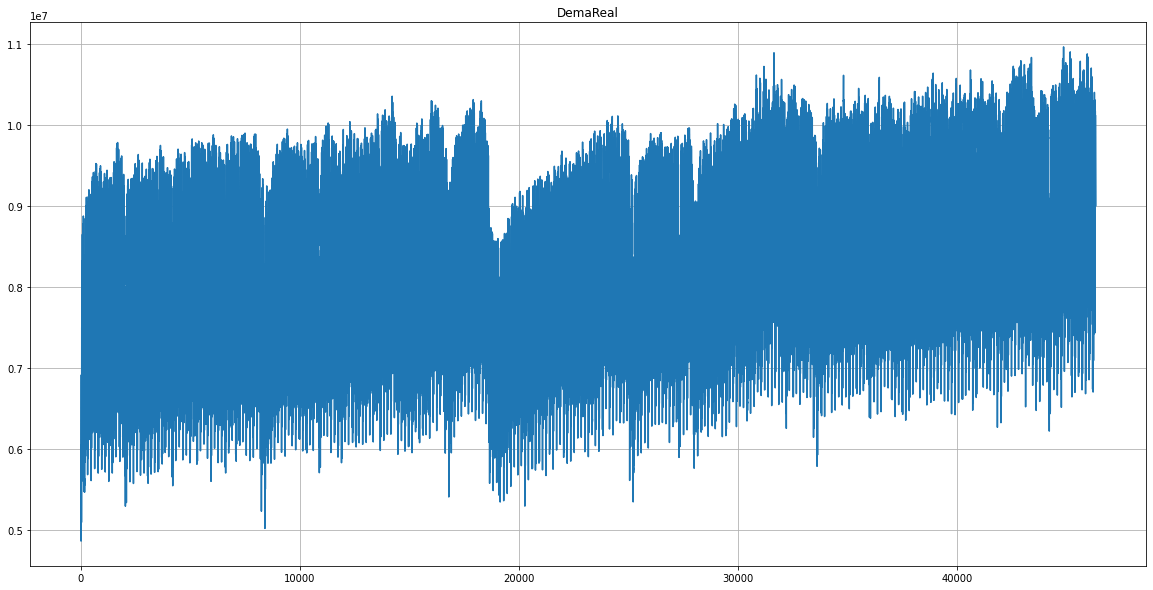

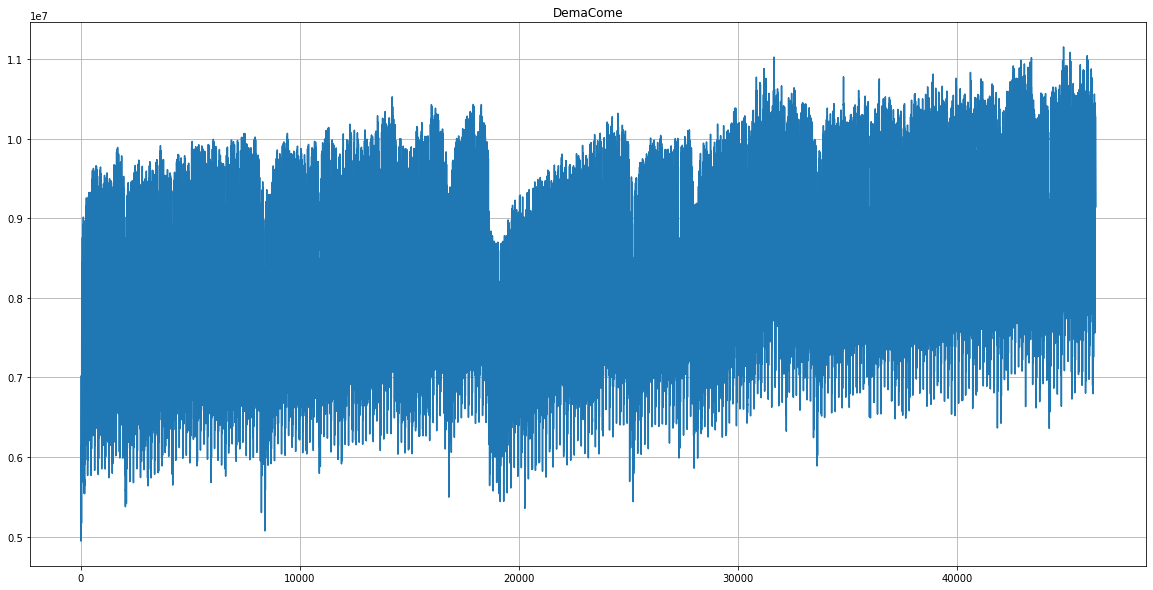

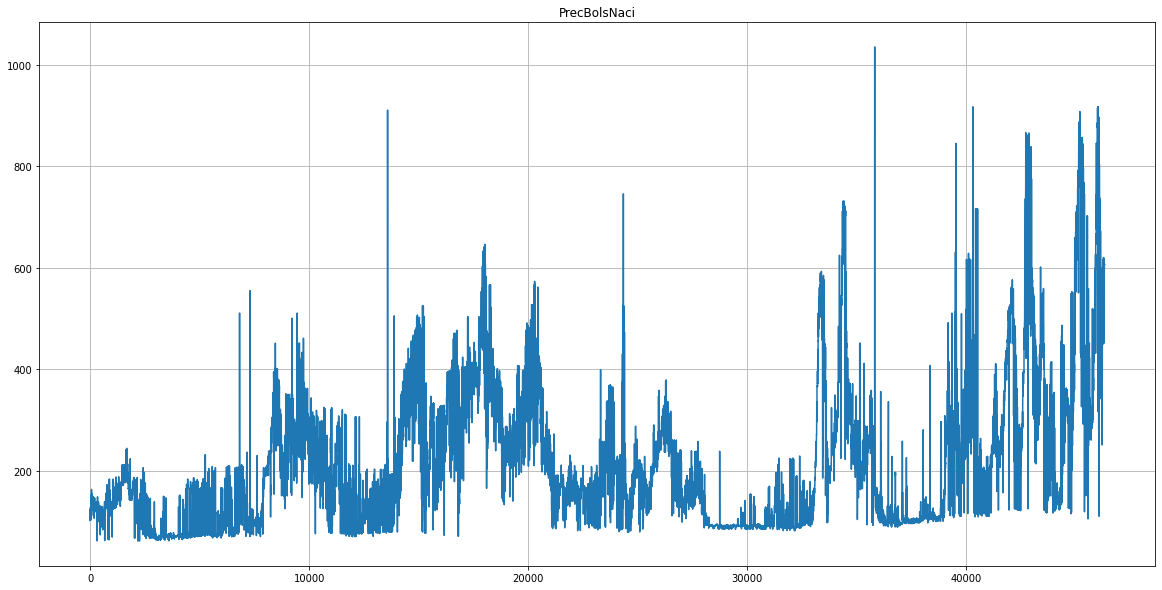

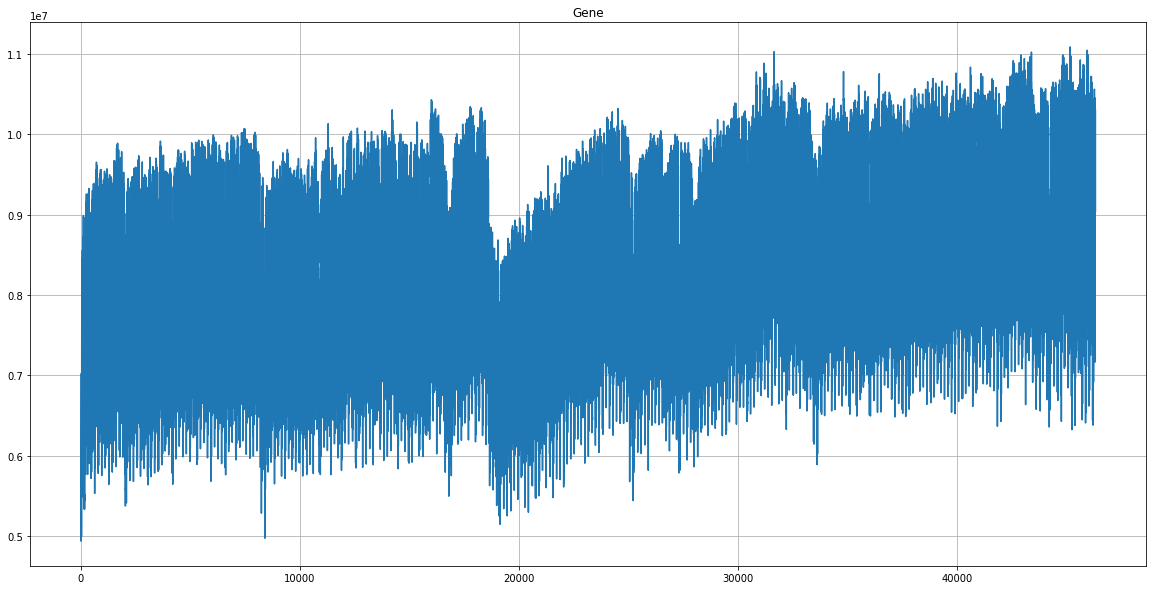

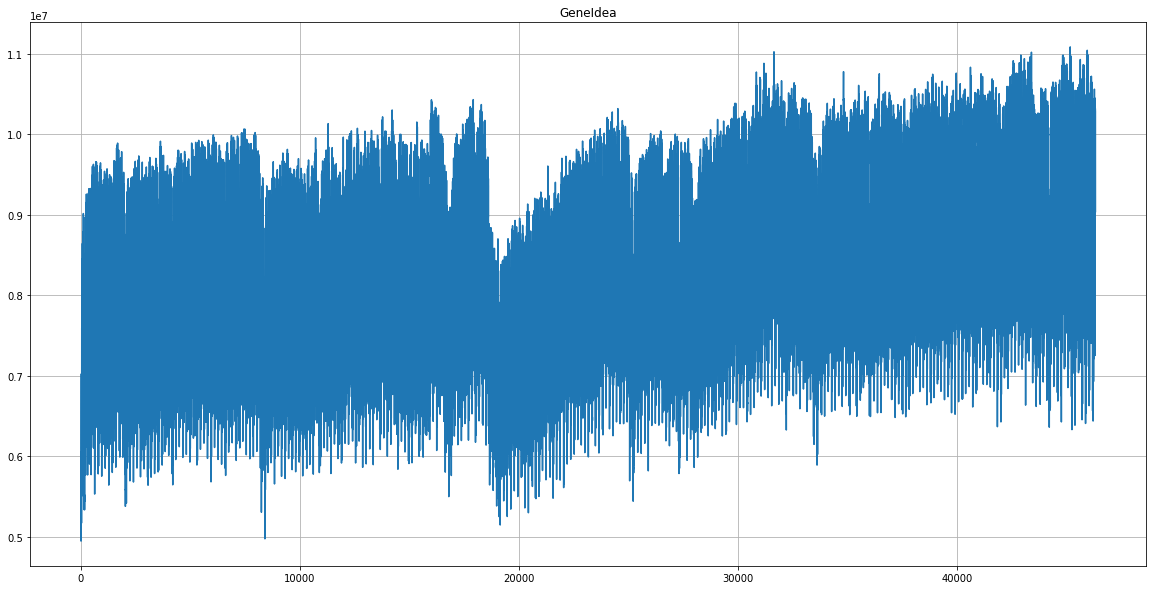

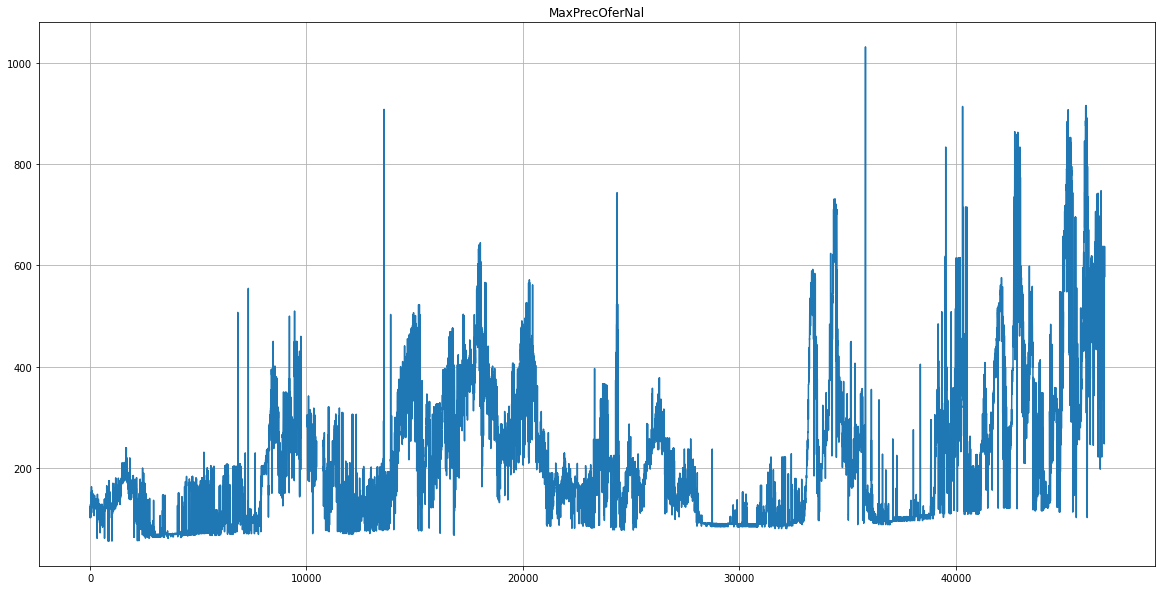

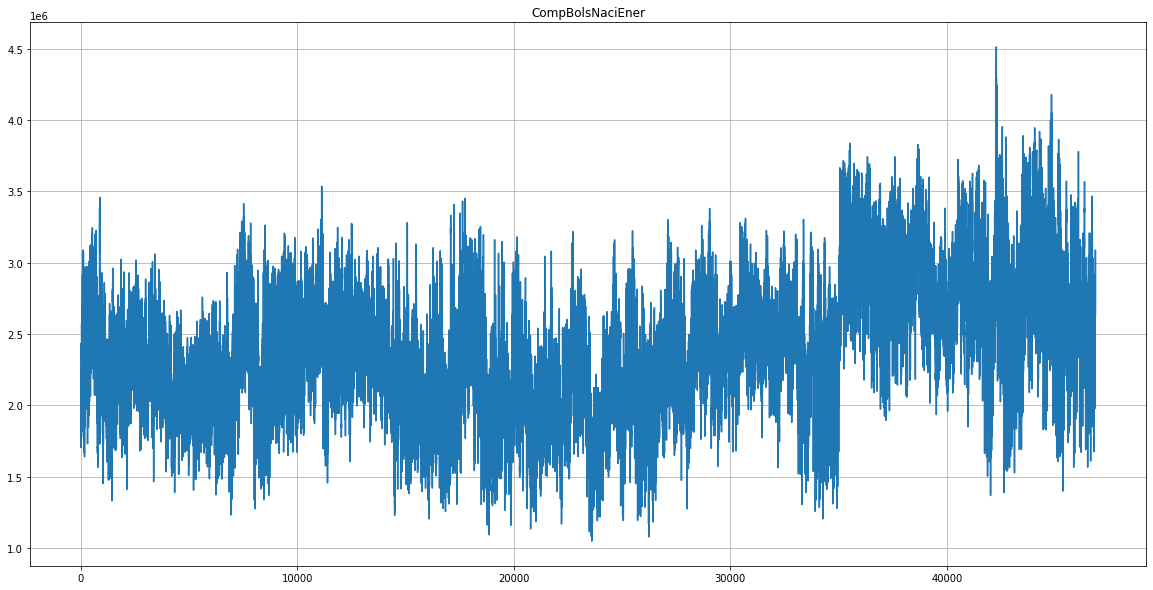

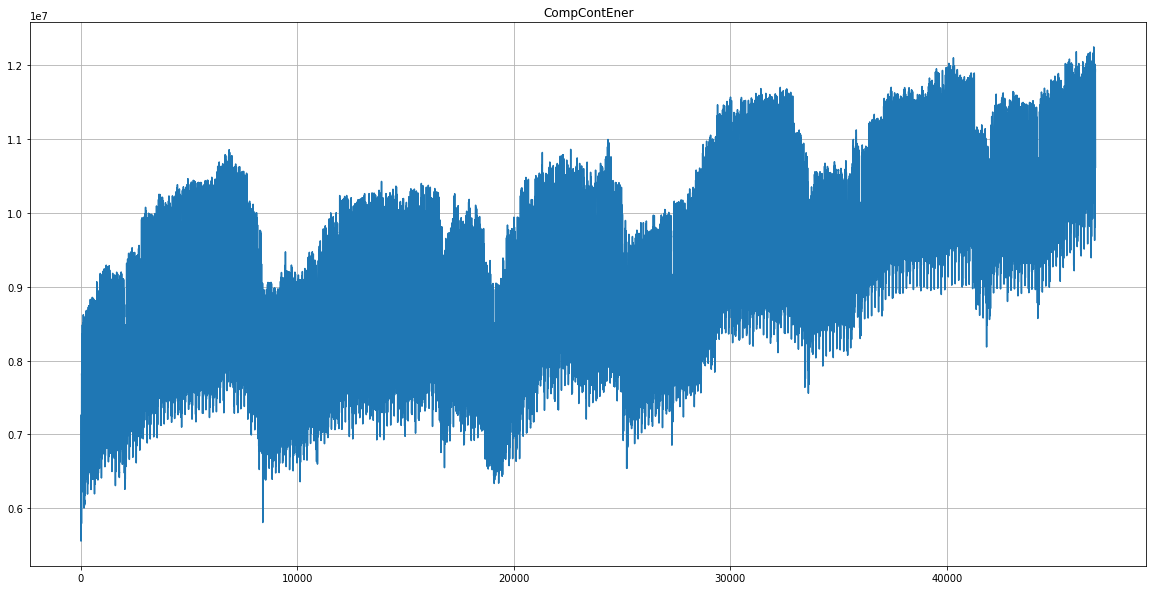

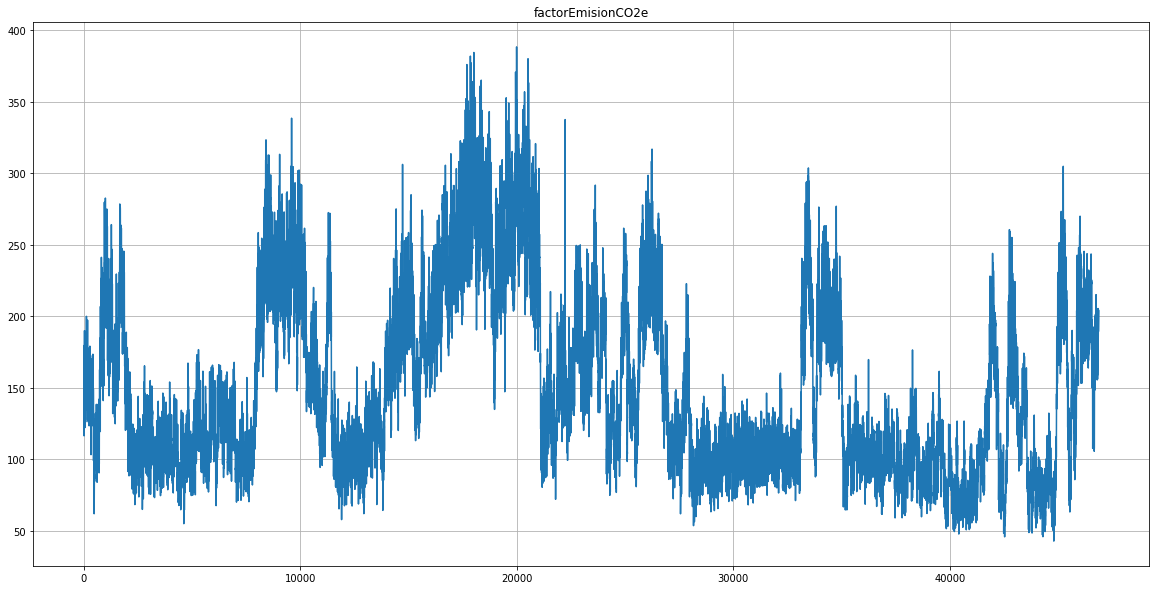

In [5]:
# plot a graph for each variable in function of the index
for i in complete_df:
    if i != 'Timestamp':
        complete_df[i].plot(figsize=(20, 10), title=i)
        #show full numbers on y axis
        ax = plt.gca()
        #add grid
        ax.grid(True)
        ax.get_yaxis().get_major_formatter().set_useOffset(False)
        
        plt.show()
    

In [6]:
#export to excel in current folder

complete_df.to_csv('consumption_varia.csv')

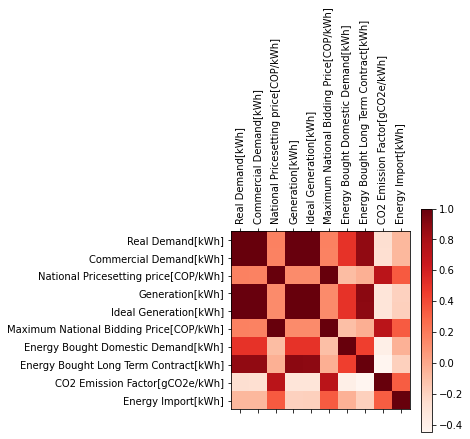

In [20]:

plt.matshow(complete_df.corr(), cmap=plt.cm.Reds, fignum=1)
plt.xticks(range(len(complete_df.columns)), complete_df.columns)
plt.xticks(rotation=90)
plt.yticks(range(len(complete_df.columns)), complete_df.columns)
plt.colorbar()
plt.show()

Findings

